# DATA 119 Final Project

## Kris Peng and Sam Leung


### Project A

#### Preprocessing

In [17]:
import numpy as np
import pandas as pd
import plotnine as p9
import statsmodels.api as sm 
import sklearn.metrics as metrics

df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_rows', None)
df = df.drop(columns=['ID', 'Z_CostContact','Z_Revenue'])

# Name the variables in a more meaningful way
df = df.rename(columns={"Response": "AcceptedLastCmp"})

# Drop the ~1% incomplete data
df['Income'].isna().sum() / df.shape[0]

df = df.dropna()
print(df.shape)
print(df.columns)
df.head(5)



(2216, 26)
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedLastCmp'],
      dtype='object')


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


#### Summary Statistics

In [18]:
# Summary statistics for Year_birth
print(df['Year_Birth'].describe())
## Remove potential data entry error
df = df.drop(df[df['Year_Birth'] < 1920].index) 

# Histogram for Year_birth
(p9.ggplot(df) + 
 p9.aes (x = 'Year_Birth') + 
 p9.geom_histogram(bins=16)+ 
 p9.labs(x = "Birth Year of Cutsomers \n", y = "Count",title= "Distribution of Birth Year of Cutsomers", 
         caption = "This histogram shows the distribution of Birth Year of Cutsomers.\n" +
          "The distribution is centered at approximately 1970, and roughly ranges from 1940 to 1995.\n" + 
          "It is an unimodal, left skewed distribution. There are no obvious unusual values."))

# Summary statistics for Income
print(df['Income'].describe(),'\n')

# Histogram for Income
(p9.ggplot(df) + 
 p9.aes (x = 'Income') + 
 p9.geom_histogram(bins=16)+ 
 p9.labs(x = "Yearly Household Income of Cutsomers\n(Log Transformed)", y = "Count",title= "Distribution of Yearly Household Income of Cutsomers", 
         caption = "This histogram shows the distribution of yearly household income of cutsomers.\n" +
          "The distribution is centered at approximately 50,000, and roughly ranges from 1000 to 700,000.\n" + 
          "It is an unimodal, left skewed distribution. There are unusually high values."))

# Summary statistics for the date of becoming customer
print(df['Dt_Customer'].describe())

# Summary statistics for Number of Recent Purchase
print(df['Recency'].describe())

# # Summary statistics for Amount of Wine Purchase
print(df['MntWines'].describe())

# Visualize the distirbution of variables
(p9.ggplot(df) + 
 p9.aes (x = 'MntWines') + 
 p9.geom_histogram(bins=16)+ 
 p9.labs(x = "Amount Spent on Wine in Last 2 Years", y = "Count",title= "Distribution of Amount Spent on Wine in Last 2 Years", 
         caption = "This histogram shows the distribution of amount spent on wine in last 2 years.\n" +
          "The distribution is centered at approximately 0, and roughly ranges from 0 to 1500.\n" + 
          "It is an unimodal, right skewed distribution. There are no unusual values."))

# Summary statistics for Amount of Fruit Purchase
print(df['MntFruits'].describe())

# Summary statistics for Amount of Meat Purchase
print(df['MntMeatProducts'].describe())

# Summary statistics for Amount of Fish Purchase
print(df['MntFishProducts'].describe())

# Summary statistics for Amount of Sweet Product Purchase
print(df['MntSweetProducts'].describe())

# Summary statistics for Amount of Gold Product Purchase
print(df['MntGoldProds'].describe())

# Summary statistics for Amount of Purchases with Discount
print(df['NumDealsPurchases'].describe())

# Summary statistics for Amount of Purchases through Website
print(df['NumWebPurchases'].describe())

# Summary statistics for Amount of Purchases through Catalogues
print(df['NumCatalogPurchases'].describe())

# Summary statistics for Amount of Purchases through Store
print(df['NumStorePurchases'].describe())

# Summary statistics for Number of Website Visit this month
print(df['NumWebVisitsMonth'].describe())

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64
count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64 

count           2213
unique           662
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object
count    2213.000000
mean       49.007682
std        28.941864
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64
count    2213.000000
mean      305.153638
std       337.305490
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64
count    2213.000000
mean       26.323995
std        39.735932
min    

#### Correlational analyses

/opt/homebrew/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


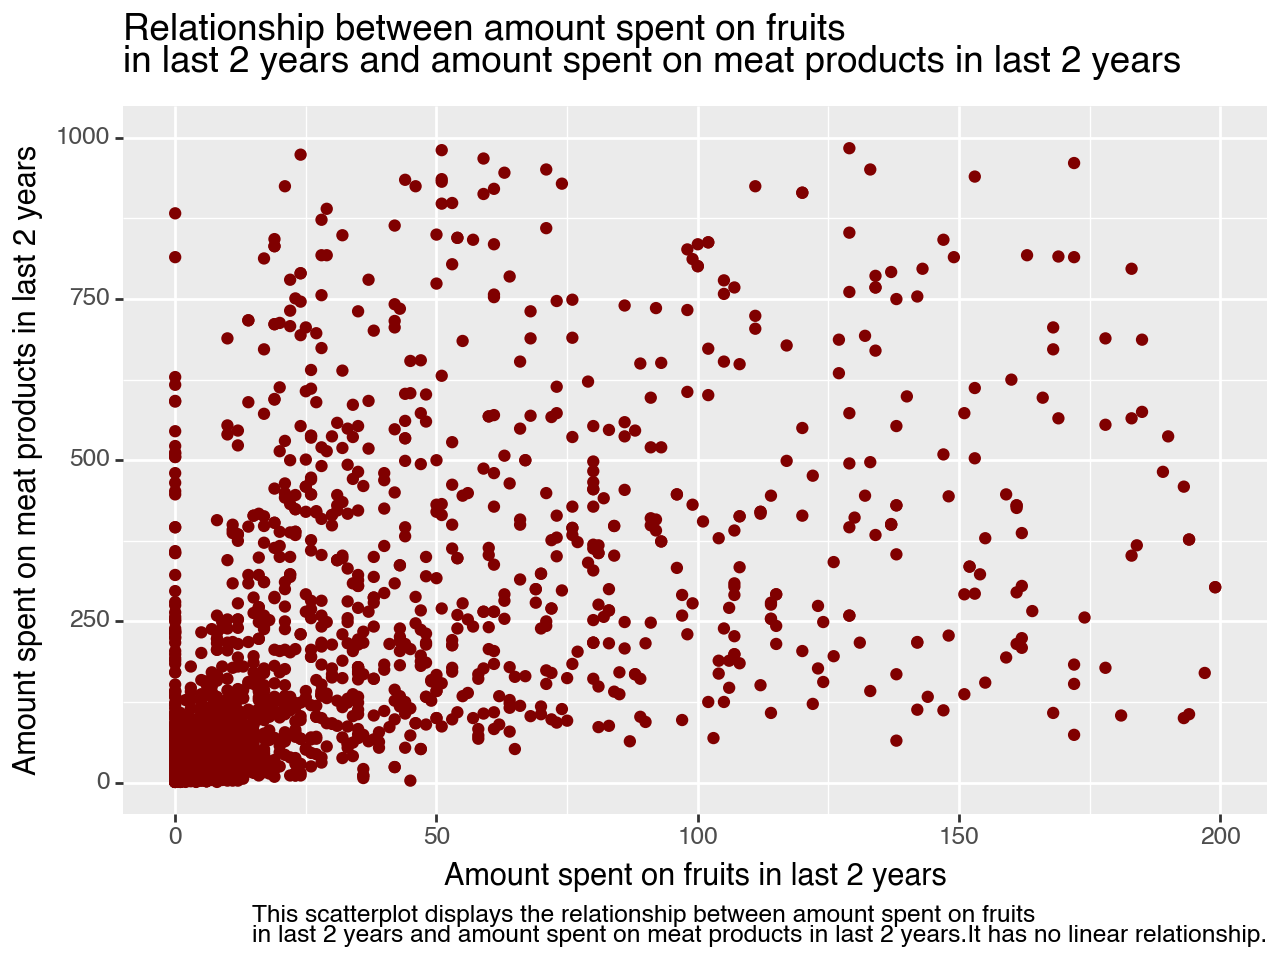

<Figure Size: (640 x 480)>

In [19]:
# Income v.s. Amount of Fruit Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntFruits'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on fruits in last 2 years ",
        title= "Relationship between customer's yearly household \nincome and amount spent on fruits in last 2 years",
          caption = "This scatterplot displays the relationship between \ncustomer's yearly household \
            income and amount\n spent on fruits in last 2 years." 
          + "It has a \nstrong positive linear relationship."))

# Income v.s. Amount of Wine Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntWines'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on wines in last 2 years ",
        title= "Relationship between customer's yearly household \nincome and amount spent on wines in last 2 years",
          caption = "This scatterplot displays the relationship between \ncustomer's yearly household \
            income and amount\n spent on wines in last 2 years." 
          + "It has a \nstrong positive relationship but looks \nlike quadratic relationship instead of linear."))

# Income v.s. Amount of Fish Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntFishProducts'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on fish in last 2 years ",
        title= "Relationship between customer's yearly household \nincome and amount spent on fish in last 2 years",
          caption = "This scatterplot displays the relationship between \ncustomer's yearly \
            household income and amount\n spent on fish in last 2 years." 
          + "It has a \nstrong positive linear relationship."))

# Income v.s. Amount of Meat Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntMeatProducts'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on meat in last 2 years ",
        title= "Relationship between customer's yearly household \n\
          income and amount spent on meat in last 2 years",
          caption = "This scatterplot displays the relationship between\
              \ncustomer's yearly household income and amount\n spent on meat in last 2 years." 
          + "It has a \nstrong positive relationship but looks \nlike\
              quadratic relationship instead of linear.\n There is an unusually high value \
                in \namount spent against low income."))


# Income v.s. Amount of Sweet Product Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntSweetProducts'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on sweet products in last 2 years ",
        title= "Relationship between customer's yearly household \nincome and amount spent on sweet products in last 2 years",
          caption = "This scatterplot displays the relationship between \ncustomer's \
            yearly household income and amount\n spent on sweet products in last 2 years." 
          + "It has a \nstrong positive linear relationship."))

# Income v.s. Amount of Gold Product Purchase
(p9.ggplot(df, p9.aes(x = 'Income', y = 'MntGoldProds'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.xlim(0,100000) +
 p9.labs(x = "Customer's yearly household income", y = "Amount spent on gold products in last 2 years",
        title= "Relationship between customer's yearly household \nincome and amount spent on gold products in last 2 years",
          caption = "This scatterplot displays the relationship between \ncustomer's yearly household \
            income and amount\n spent on gold products in last 2 years." 
          + "It has a \moderate positive linear relationship."))

# Year of Birth v.s. Income
(p9.ggplot(df, p9.aes(x = 'Year_Birth', y = 'Income'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.ylim(0,100000) +
 p9.labs(x = "Year of Birth", y = "Customer's Yearly Household Income",
        title= "Relationship between year of birth\n and customer's yearly household income",
          caption = "This scatterplot displays the relationship between year of birth\n and customer's yearly household income." 
          + "It has no linear relationship."))

# Amount of Fruit Purchase v.s. Amount of Meat Purchase
(p9.ggplot(df, p9.aes(x = 'MntFruits', y = 'MntMeatProducts'))  + 
 p9.geom_point(color = 'maroon') + 
 p9.ylim(1,1000) +
 p9.labs(x = "Amount spent on fruits in last 2 years", y = "Amount spent on meat products in last 2 years",
        title= "Relationship between amount spent on fruits \nin last 2 years and amount spent on meat products in last 2 years",
          caption = "This scatterplot displays the relationship between amount spent on fruits \nin last 2 years and amount spent on meat products in last 2 years." 
          + "It has no linear relationship."))

### Project B

#### Correlation Matrices

In [20]:
data = pd.get_dummies(df, columns=['Education','Marital_Status'],drop_first = True)
data.head(5)
data.corr()

ValueError: could not convert string to float: '04-09-2012'

#### Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(['Dt_Customer','AcceptedLastCmp'], axis = 1)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Conclusion**: 

There is not a strong or obvious multicollinearity between variables except among those encoding different marital status. A customer's year of birth is also a strong contributor to multicollinearity possibly because it is almost a perfect predictor of kids or teenager at home, and also to the number of each purchases.